In [203]:
from keras.models import Sequential
from keras.layers import Dense, Activation, LeakyReLU, ELU, BatchNormalization, Dropout
from keras import backend
from keras.callbacks import TensorBoard
from keras.optimizers import Adam, SGD
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [204]:
data = pd.read_csv("BetterSimulation.csv").iloc[:,1:]

In [205]:
data

,S,K,T,r,sigma,call_price
0,216.496496,354.115947,0.099716,0.010808,0.427778,1.266835e-03
1,414.654655,396.388692,0.169814,0.014444,0.402020,3.744634e+01
2,202.762763,365.089082,1.139496,0.020505,0.298990,1.309998e+00
3,279.769770,482.853413,0.318771,0.030000,0.058586,1.589297e-59
4,361.681682,310.912327,2.967872,0.012222,0.376263,1.183423e+02
...,...,...,...,...,...,...
299995,411.711712,522.510367,0.169814,0.028384,0.693939,1.535299e+01
299996,395.525526,52.845394,0.461887,0.028182,0.814141,3.433659e+02
299997,405.335335,112.482308,2.161751,0.012626,0.513636,2.984205e+02
299998,52.672673,116.859373,2.795549,0.025152,0.736869,1.447589e+01


In [206]:
call_X_train, call_X_test, call_y_train, call_y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=0.1, random_state=42)

In [207]:
model = Sequential()
t_l = []
v_l = []
model.add(Dense(200, input_dim=call_X_train.shape[1]))
model.add(LeakyReLU())
model.add(Dense(200))
model.add(ELU())
model.add(Dense(200))
model.add(ELU())
model.add(Dense(200))
model.add(ELU())
model.add(Dense(1, activation='relu'))

In [208]:
model.compile(loss='mse', optimizer=Adam(learning_rate=0.001))

In [209]:
model.summary()

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_183 (Dense)           (None, 200)               1200      
                                                                 
 leaky_re_lu_41 (LeakyReLU)  (None, 200)               0         
                                                                 
 dense_184 (Dense)           (None, 200)               40200     
                                                                 
 elu_104 (ELU)               (None, 200)               0         
                                                                 
 dense_185 (Dense)           (None, 200)               40200     
                                                                 
 elu_105 (ELU)               (None, 200)               0         
                                                                 
 dense_186 (Dense)           (None, 200)             

In [210]:
history = model.fit(call_X_train, call_y_train,
                    batch_size=10240, epochs=5,
                    validation_split = 0.01,
                    callbacks=[TensorBoard()],
                    verbose=1)

Epoch 1/5


/Users/macongcong/opt/anaconda3/envs/tensorflow_silicon/lib/python3.9/site-packages/keras/engine/data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]
2023-04-16 22:09:26.285646: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


27/27 [==============================] - 2s 49ms/step - loss: 3254.6602 - val_loss: 748.3466
Epoch 2/5
 1/27 [>.............................] - ETA: 1s - loss: 721.9067

2023-04-16 22:09:27.701889: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


27/27 [==============================] - 1s 38ms/step - loss: 705.9234 - val_loss: 682.1752
Epoch 3/5
27/27 [==============================] - 1s 35ms/step - loss: 682.7288 - val_loss: 670.3167
Epoch 4/5
27/27 [==============================] - 1s 35ms/step - loss: 680.7444 - val_loss: 669.5855
Epoch 5/5
27/27 [==============================] - 1s 35ms/step - loss: 679.2148 - val_loss: 667.8466


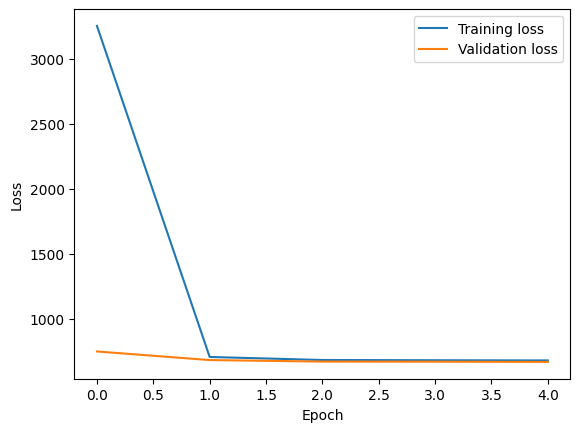

In [211]:
train_loss = model.history.history['loss']
val_loss = model.history.history['val_loss']
t_l.extend(train_loss) # combining two lists
v_l.extend(val_loss)
plt.plot(t_l, label='Training loss')
plt.plot(v_l, label='Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [213]:
# models with batch normalization
# model = Sequential()
# t_l = []
# v_l = []
# model.add(Dense(200, input_dim=call_X_train.shape[1]))
# model.add(BatchNormalization())
# model.add(LeakyReLU())
# model.add(Dense(200, input_dim=call_X_train.shape[1]))
# model.add(BatchNormalization())
# model.add(LeakyReLU())
# model.add(Dense(200))
# model.add(BatchNormalization())
# model.add(ELU())
# model.add(Dense(200))
# model.add(BatchNormalization())
# model.add(ELU())
# model.add(Dense(1, activation='relu'))
# model.compile(loss='mse', optimizer=Adam(learning_rate=0.001))
model = Sequential()
t_l = []
v_l = []
model.add(Dense(100, input_dim=call_X_train.shape[1]))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dense(200))
model.add(BatchNormalization())
model.add(ELU())

#newly added
model.add(Dropout(0.5))
model.add(Dense(200))
model.add(BatchNormalization())
model.add(ELU())

model.add(Dropout(0.5))
model.add(Dense(300))
model.add(BatchNormalization())
model.add(ELU())
model.add(Dropout(0.5))
model.add(Dense(200))
model.add(BatchNormalization())
model.add(ELU())
model.add(Dropout(0.5))
model.add(Dense(200))
model.add(BatchNormalization())
model.add(ELU ())
model.add(Dense(1, activation='relu'))
model.compile(optimizer=Adam(learning_rate=0.001), loss="mape")

In [214]:
model.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_195 (Dense)           (None, 100)               600       
                                                                 
 batch_normalization_84 (Bat  (None, 100)              400       
 chNormalization)                                                
                                                                 
 leaky_re_lu_43 (LeakyReLU)  (None, 100)               0         
                                                                 
 dense_196 (Dense)           (None, 200)               20200     
                                                                 
 batch_normalization_85 (Bat  (None, 200)              800       
 chNormalization)                                                
                                                                 
 elu_112 (ELU)               (None, 200)             

In [217]:
history = model.fit(call_X_train, call_y_train,
                    batch_size=20480, epochs=10,
                    validation_split = 0.01,
                    callbacks=[TensorBoard()],
                    verbose=1)

Epoch 1/10


/Users/macongcong/opt/anaconda3/envs/tensorflow_silicon/lib/python3.9/site-packages/keras/engine/data_adapter.py:1696: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]


14/14 [==============================] - 2s 158ms/step - loss: 97.7370 - val_loss: 92.0186
Epoch 2/10
14/14 [==============================] - 2s 137ms/step - loss: 104.9155 - val_loss: 92.0408
Epoch 3/10
14/14 [==============================] - 2s 132ms/step - loss: 92.6821 - val_loss: 92.0611
Epoch 4/10
14/14 [==============================] - 2s 142ms/step - loss: 1624.7689 - val_loss: 92.0702
Epoch 5/10
14/14 [==============================] - 2s 135ms/step - loss: 92.6759 - val_loss: 92.0793
Epoch 6/10
14/14 [==============================] - 2s 145ms/step - loss: 729.0607 - val_loss: 92.0850
Epoch 7/10
14/14 [==============================] - 2s 140ms/step - loss: 92.7299 - val_loss: 92.0944
Epoch 8/10
14/14 [==============================] - 2s 155ms/step - loss: 92.6754 - val_loss: 92.1066
Epoch 9/10
14/14 [==============================] - 2s 134ms/step - loss: 92.7023 - val_loss: 92.1178
Epoch 10/10
14/14 [==============================] - 2s 133ms/step - loss: 92.6702 - val_

In [173]:
call_y_pred = model.predict(call_X_test)

938/938 [==============================] - 4s 4ms/step


In [174]:
pd.DataFrame(call_y_pred)

,0
0,361.625763
1,64.671814
2,191.469696
3,159.951096
4,278.238556
...,...
29995,147.752991
29996,0.000000
29997,14.036963
29998,226.771240


In [175]:
pd.DataFrame(call_y_test)

,call_price
4941,3.397571e+02
51775,4.680649e+01
115253,1.721534e+02
299321,1.473695e+02
173570,2.630937e+02
...,...
199500,1.403368e+02
244038,1.296623e-02
79446,1.067921e+01
276390,2.134077e+02
